# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Run All Soundscapy Tests For All Waves</h1>

In [1]:
# imports
import json
import pandas as pd
from tqdm import tqdm
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Set width to fit the entire DataFrame

from soundscapy import Binaural
from soundscapy import AnalysisSettings
from soundscapy.analysis.binaural import prep_multiindex_df, add_results, process_all_metrics

wav_folder = Path().cwd().joinpath("Field Rec")
levels = wav_folder.joinpath("Levels.json")

with open(levels) as f:
    levels = json.load(f)
    
df = prep_multiindex_df(levels, incl_metric=False)

analysis_settings = AnalysisSettings.default()
analysis_settings["MoSQITo"]["loudness_zwtv"]["run"] = True
analysis_settings["MoSQITo"]["sharpness_din_from_loudness"]["run"] = True
analysis_settings["MoSQITo"]["sharpness_din_perseg"]["run"] = False
#analysis_settings["MoSQITo"]["roughness_dw"]["run"] = False

#df = b.process_all_metrics(analysis_settings, verbose=True)

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):
    recording = wav.stem
    pbar.set_description(f"Processing {recording}")
    decibel = tuple(levels[recording].values())
    b = Binaural.from_wav(wav, calibrate_to=decibel)
    df = add_results(df, b.process_all_metrics(analysis_settings, verbose=False, parallel=True)) # Process all metrics and add to results df



Processing 10m:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\8x9-45a\AppData\Local\Programs\Python\Python311\Lib\site-packages\acoustics\_signal.py:1048: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)
Processing 10m:   0%|          | 0/6 [04:05<?, ?it/s]


AttributeError: module 'maad' has no attribute 'features'

<h1 style="color:orange ; font-weight: bold; font-style: italic;">Save the File as an Excel File</h1>

In [4]:
from pathlib import Path
from datetime import datetime
Excel_Docs_Folder = Path().cwd().joinpath("Excel Docs")
df.to_excel(Excel_Docs_Folder.joinpath("", f"AllTest_{datetime.today().strftime('%Y-%m-%d')}.xlsx"))

#df.to_excel(wav_folder.parent.joinpath("", f"AllTest_{datetime.today().strftime('%Y-%m-%d')}.xlsx"))

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Binaural Graph</h1>

  0%|          | 0/6 [00:00<?, ?it/s]c:\Users\8x9-45a\AppData\Local\Programs\Python\Python311\Lib\site-packages\acoustics\_signal.py:1048: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)
100%|██████████| 6/6 [00:04<00:00,  1.32it/s]
c:\Users\8x9-45a\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


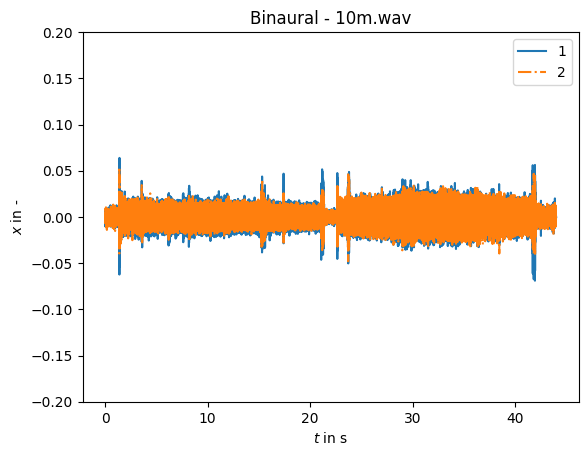

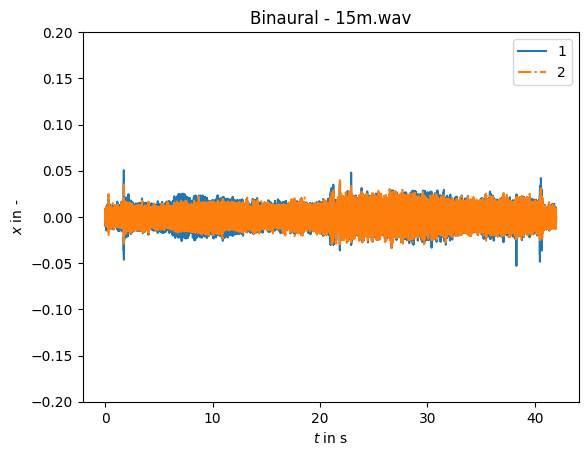

c:\Users\8x9-45a\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


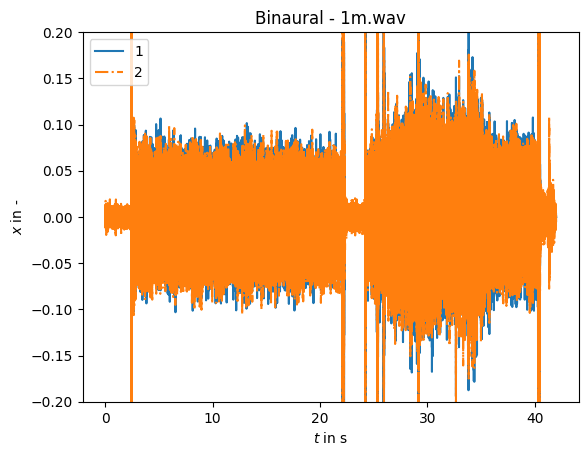

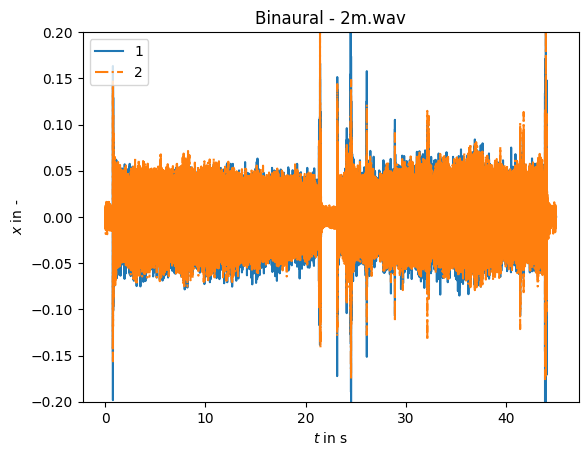

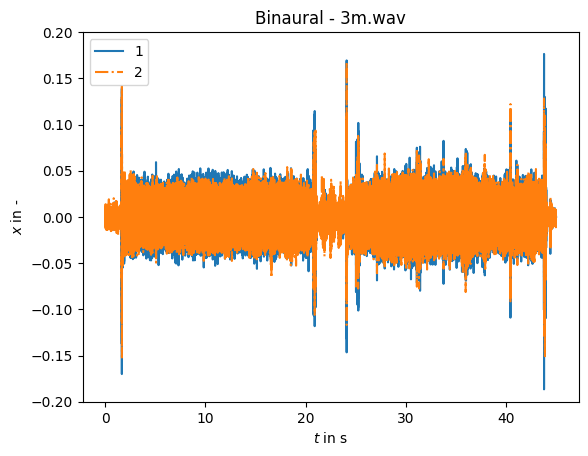

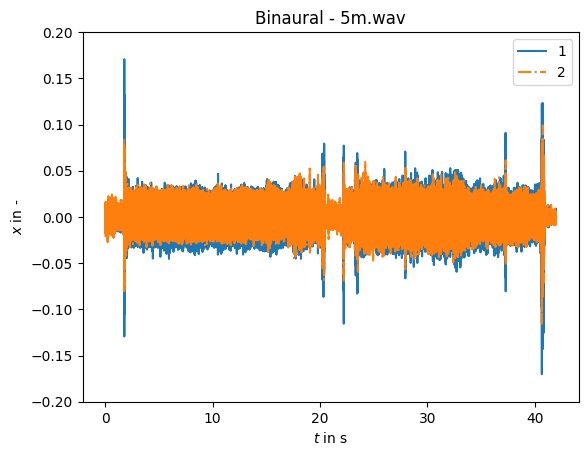

In [1]:
import json
from tqdm import tqdm
from pathlib import Path
from soundscapy import Binaural

wav_folder = Path().cwd().joinpath("Field Rec")
levels = wav_folder.joinpath("Levels.json")

with open("Field Rec/Levels.json") as f:
    levels= json.load(f)

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):
    b = Binaural.from_wav(wav)
    decibel = (levels[b.recording]["Left"], levels[b.recording]["Left"])
    b = Binaural.from_wav(wav, calibrate_to=decibel)
    b.plot(title='Binaural - ' + wav.name,  ylim=(-0.2, 0.2))
   


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Mel-Frequency Spectrogram</h1>

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:05<00:00,  1.10it/s]


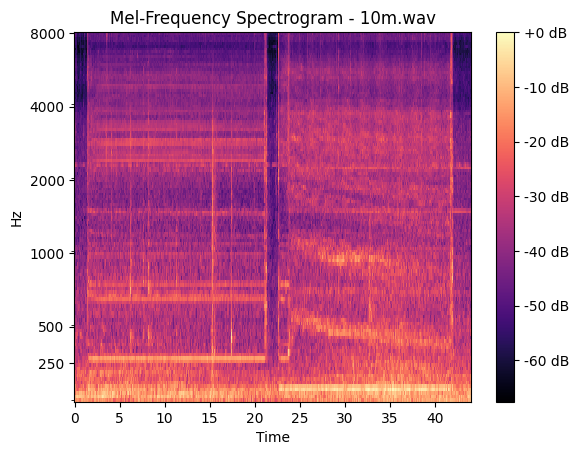

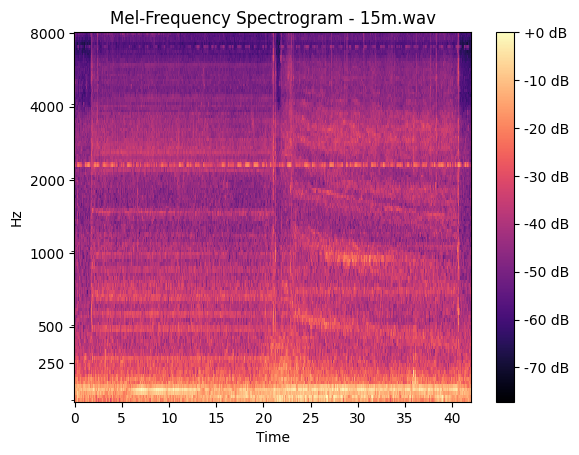

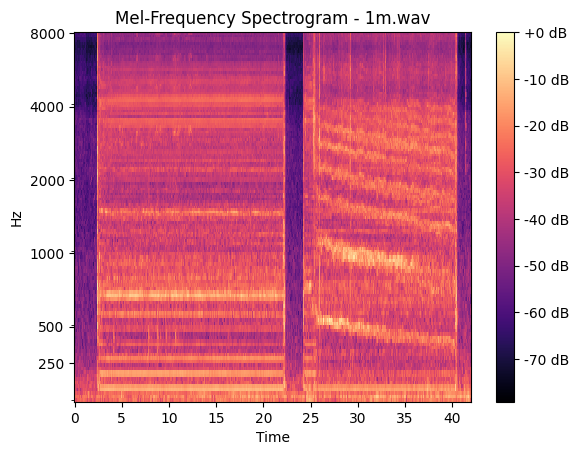

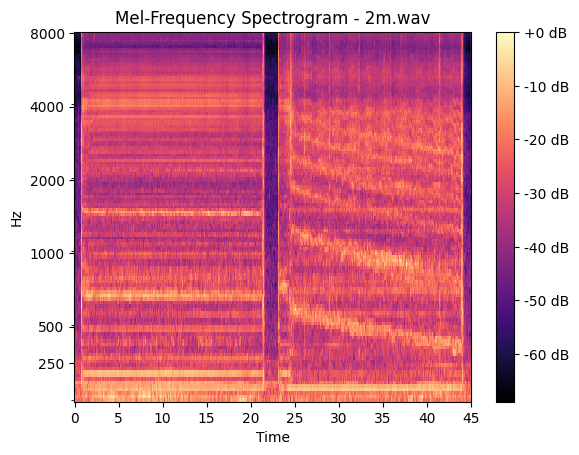

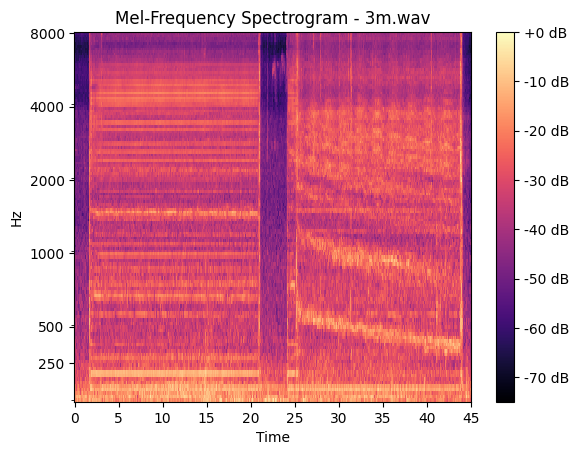

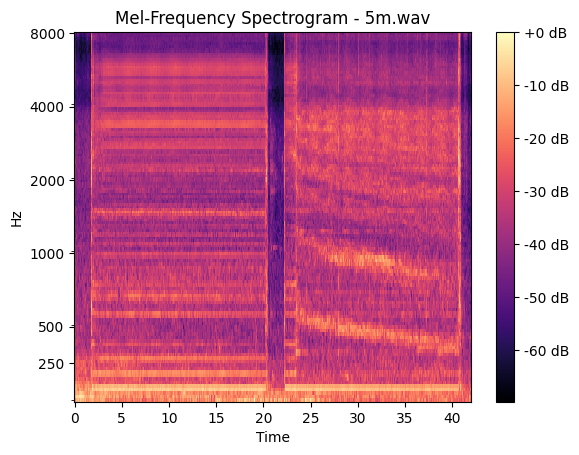

In [2]:
import librosa
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

wav_folder = Path().cwd().joinpath("Field Rec")

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):
   
    y, sr = librosa.load(wav)
    librosa.feature.melspectrogram(y=y, sr=sr)


    D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=D, sr=sr)

    # Passing through arguments to the Mel filters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)


    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
    plt.yticks([250,500,1000,2000,4000,8000])
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-Frequency Spectrogram - ' + wav.name)

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Linear-Frequency Spectrogram</h1>

  0%|          | 0/6 [00:00<?, ?it/s]

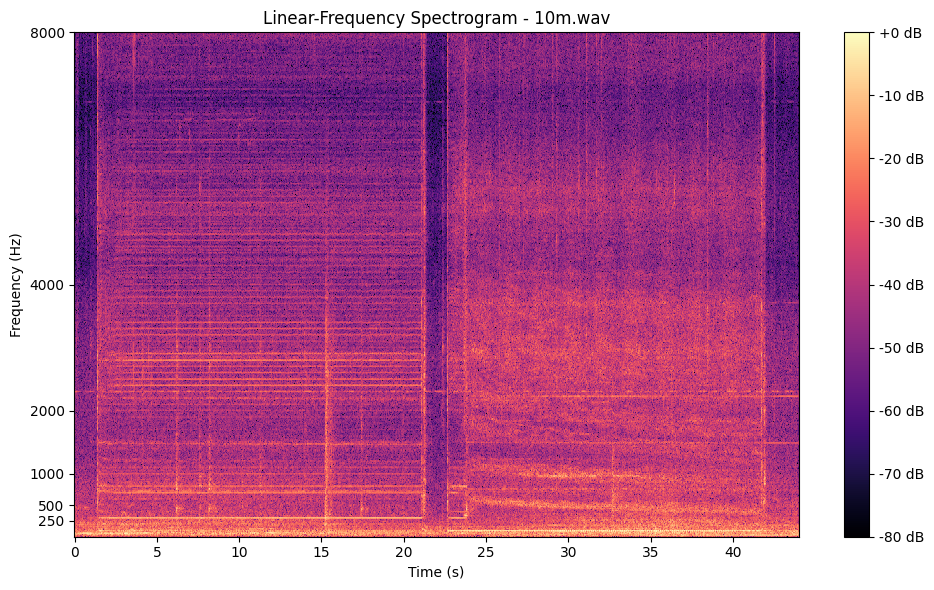

 17%|█▋        | 1/6 [00:01<00:07,  1.51s/it]

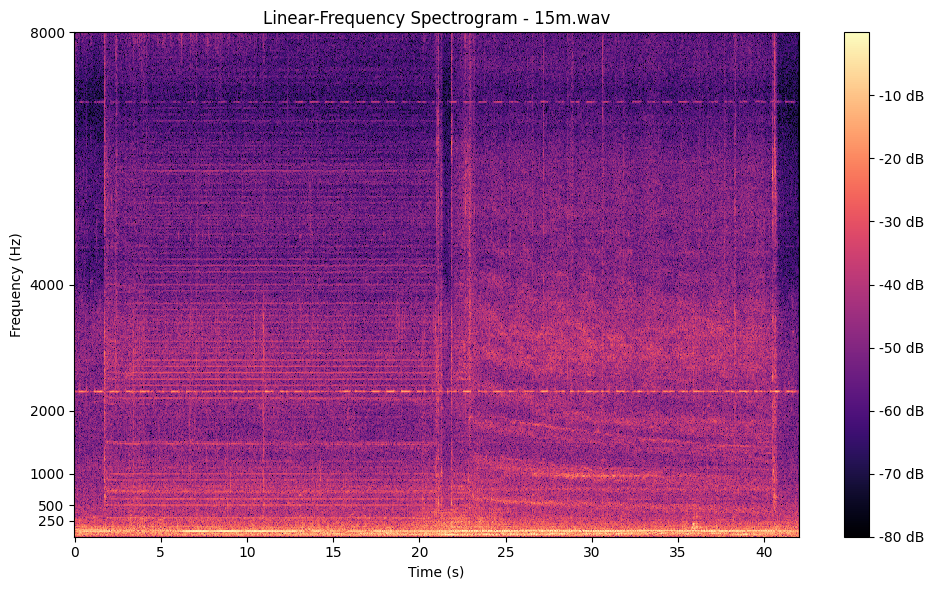

 33%|███▎      | 2/6 [00:03<00:06,  1.63s/it]

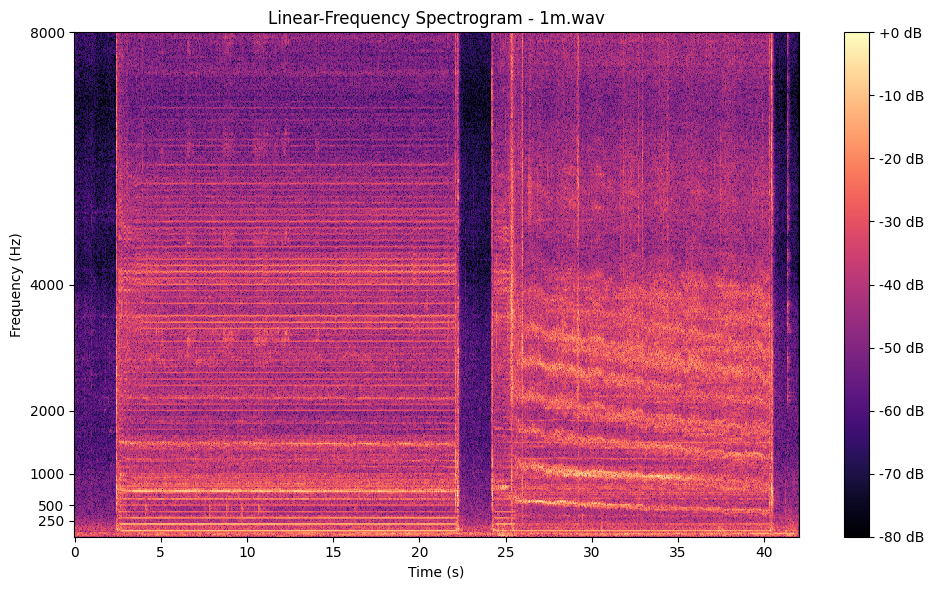

 50%|█████     | 3/6 [00:04<00:04,  1.59s/it]

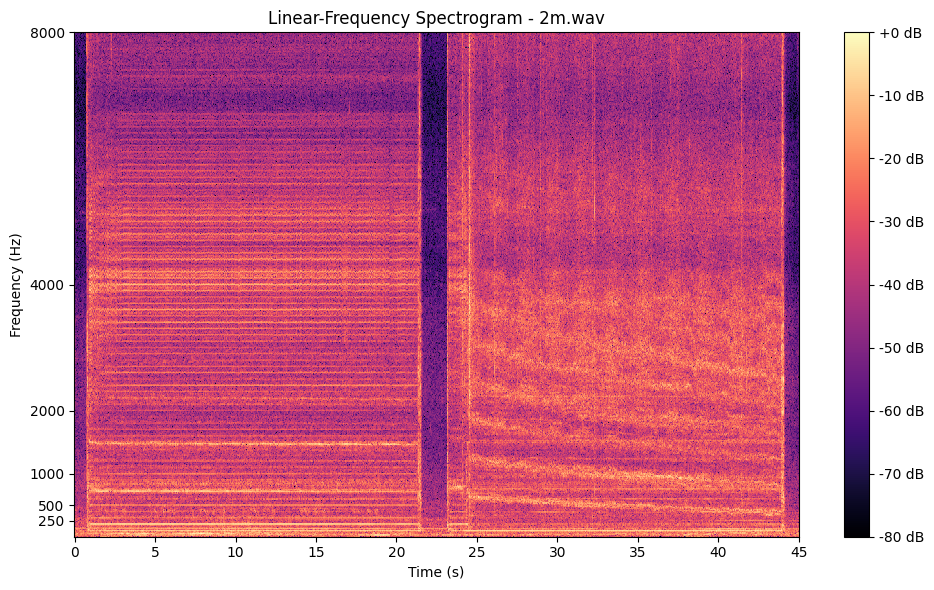

 67%|██████▋   | 4/6 [00:06<00:03,  1.59s/it]

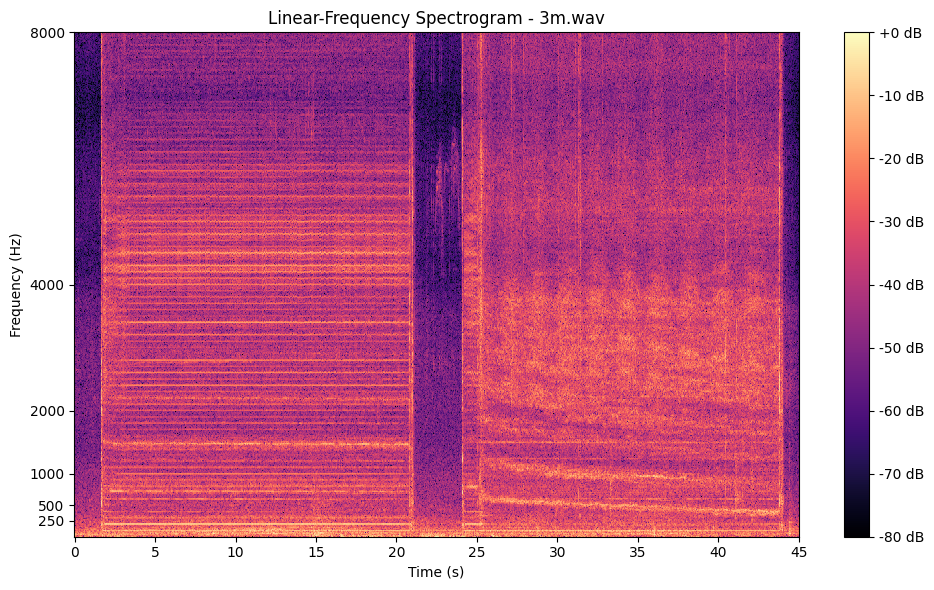

 83%|████████▎ | 5/6 [00:07<00:01,  1.58s/it]

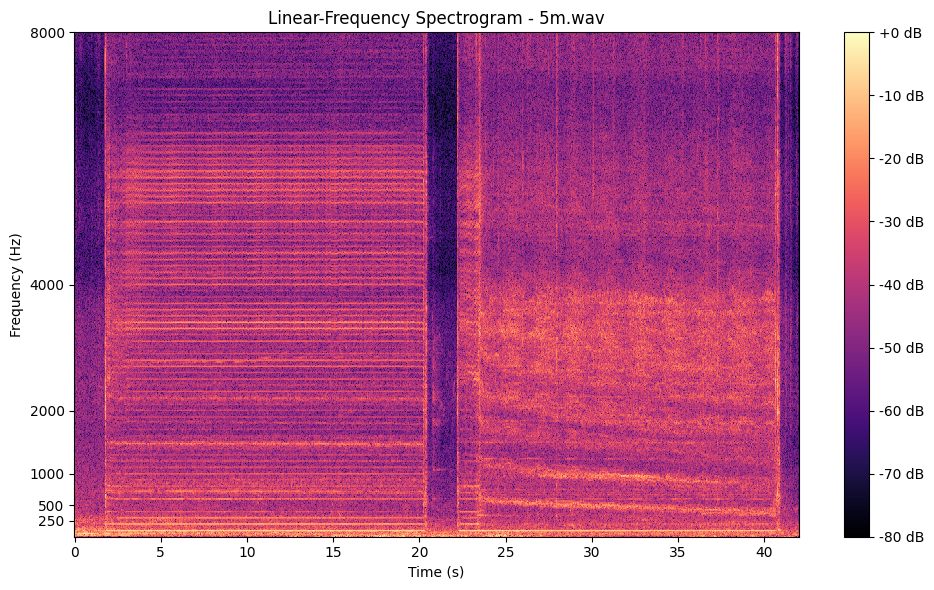

100%|██████████| 6/6 [00:09<00:00,  1.57s/it]


In [3]:
import librosa
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

wav_folder = Path().cwd().joinpath("Field Rec")

# Loading (you can load any wave under the Field Rec folder. We Chose "10m.wav")
#binaural_wav = wav_folder.joinpath("10m.wav")

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):   
    y, sr = librosa.load(wav)

    # Compute spectrogram
    D = np.abs(librosa.stft(y))
    spectrogram = librosa.amplitude_to_db(D, ref=np.max)

    # Display spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-Frequency Spectrogram - ' + wav.name)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0,8000)
    plt.yticks([250,500,1000,2000,4000,8000])
    plt.tight_layout()
    plt.show()

# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Dominant Frequencies over Time</h1>

  0%|          | 0/6 [00:00<?, ?it/s]

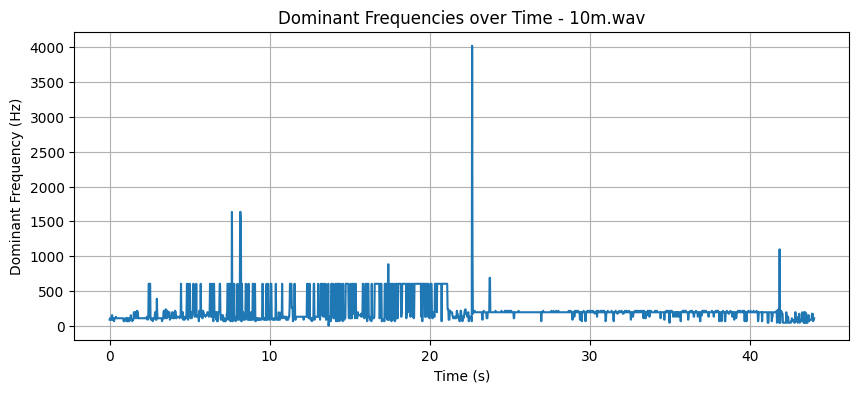

 17%|█▋        | 1/6 [00:00<00:01,  2.99it/s]

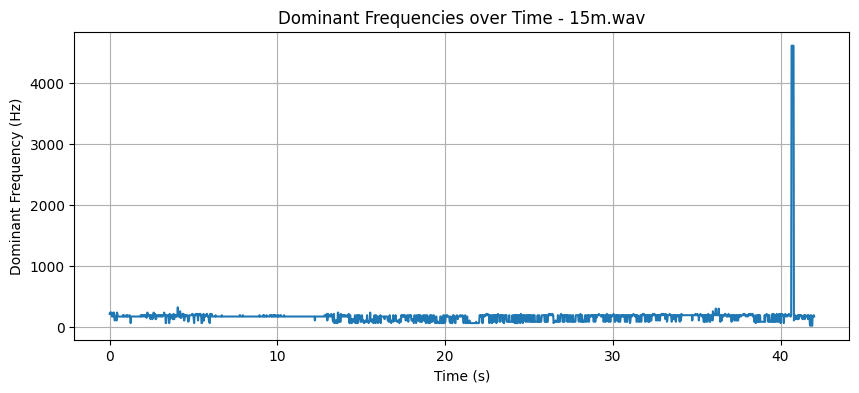

 33%|███▎      | 2/6 [00:00<00:01,  3.21it/s]

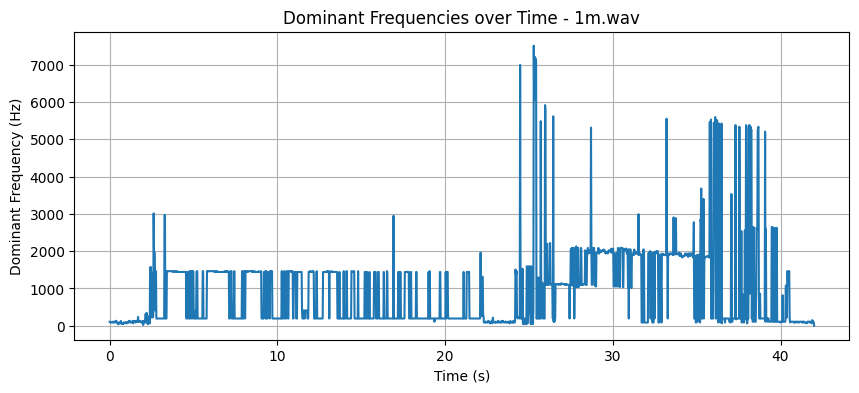

 50%|█████     | 3/6 [00:01<00:01,  2.59it/s]


IndexError: index 780 is out of bounds for axis 0 with size 513

In [4]:
import librosa
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

wav_folder = Path().cwd().joinpath("Field Rec")

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):
    
# Load the audio file
#audio_path = 'C:/Users/fspintern1/Desktop/Internship - Hussam/Intern/Collected Data/Field Rec/1m.wav'

    audio, sr = librosa.load(wav)

    # Compute the STFT
    stft = librosa.stft(audio)
    magnitude, phase = librosa.magphase(stft)

    # Convert to dB scale
    spectrogram_db = librosa.amplitude_to_db(magnitude)

    # Find the dominant frequencies
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=stft.shape[0])
    dominant_freqs = frequencies[np.argmax(spectrogram_db, axis=0)]

    # Create a time array based on the number of frames
    frames = range(len(dominant_freqs))
    time = librosa.frames_to_time(frames, sr=sr)

    # Plot the dominant frequencies over time
    plt.figure(figsize=(10, 4))
    plt.plot(time, dominant_freqs)
    plt.xlabel('Time (s)')
    plt.ylabel('Dominant Frequency (Hz)')
    plt.title('Dominant Frequencies over Time - ' + wav.name )
    plt.grid(True)
    plt.show()


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot FFT Magnitude (0 - 8000 Hz)</h1>

  0%|          | 0/6 [00:00<?, ?it/s]

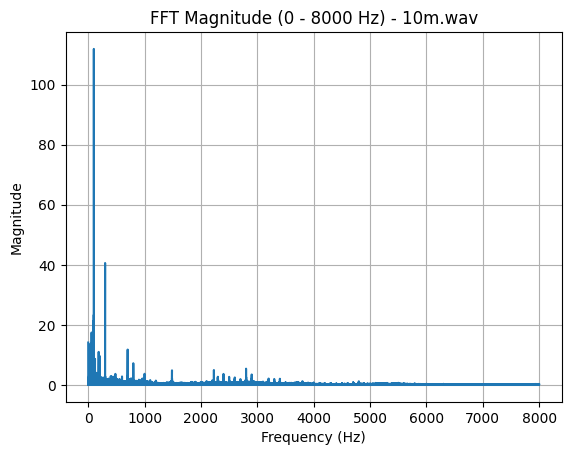

 17%|█▋        | 1/6 [00:01<00:05,  1.11s/it]

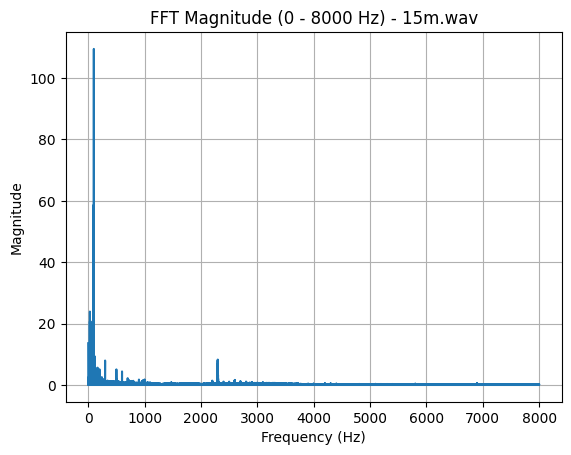

 33%|███▎      | 2/6 [00:01<00:03,  1.09it/s]

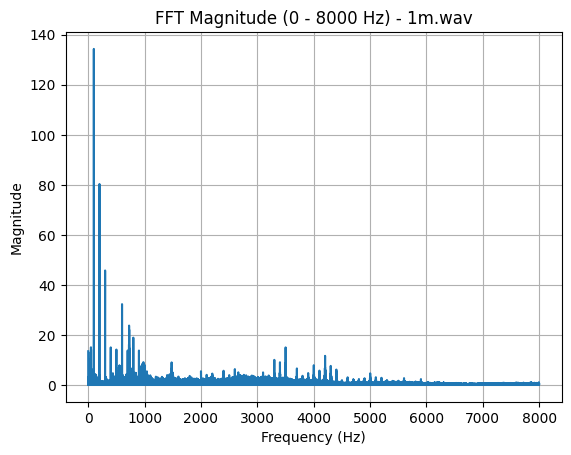

 50%|█████     | 3/6 [00:02<00:02,  1.23it/s]

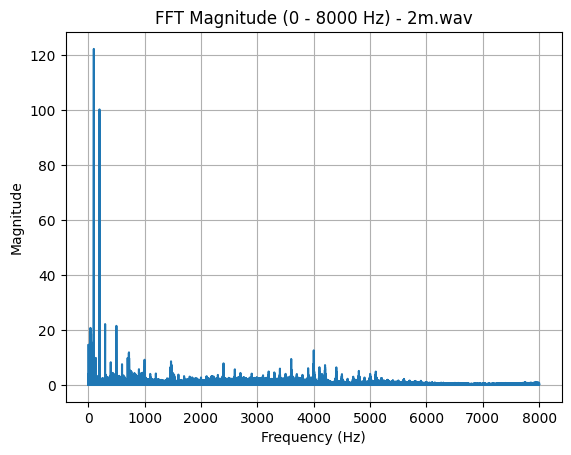

 67%|██████▋   | 4/6 [00:03<00:01,  1.24it/s]

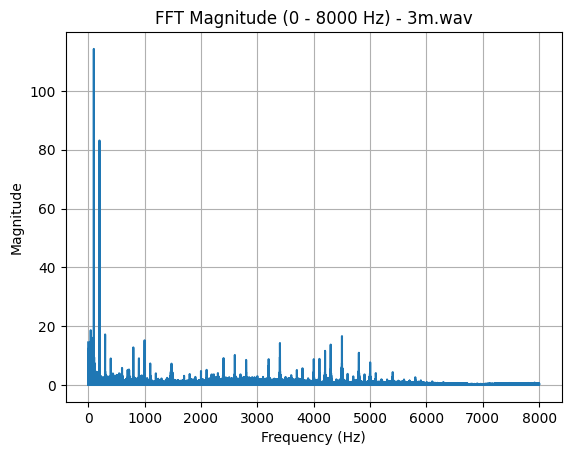

 83%|████████▎ | 5/6 [00:04<00:00,  1.28it/s]

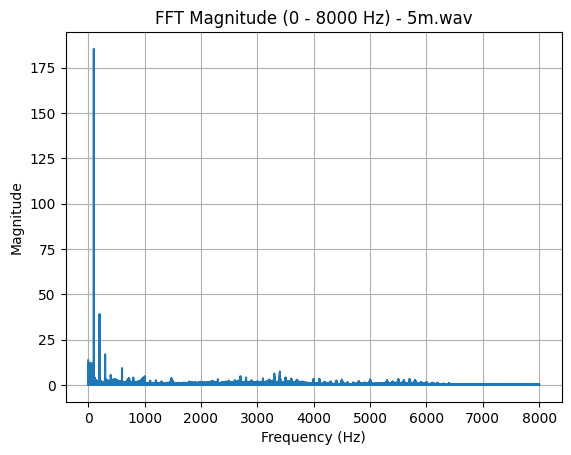

100%|██████████| 6/6 [00:04<00:00,  1.26it/s]


In [5]:
import librosa
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

wav_folder = Path().cwd().joinpath("Field Rec")

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):

# Load the .wav file
#audio_path = 'C:/Users/fspintern1/Desktop/Internship - Hussam/Intern/Collected Data/Field Rec/1m.wav'

    sound_data, sampling_rate = librosa.load(wav, sr=None)

    # Calculate the FFT magnitude
    fft_magnitude = np.abs(np.fft.fft(sound_data))

    # Generate the frequency axis
    frequency_axis = np.fft.fftfreq(len(sound_data), d=1/sampling_rate)

    # Set the desired frequency range
    freq_min = 0
    freq_max = 8000

    # Find the indices corresponding to the desired frequency range
    indices = np.where(np.logical_and(frequency_axis >= freq_min, frequency_axis <= freq_max))[0]

    # Plot the FFT magnitude within the desired frequency range
    plt.plot(frequency_axis[indices], fft_magnitude[indices])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('FFT Magnitude (0 - 8000 Hz) - ' + wav.name)
    plt.grid(True)
    plt.show()


# <h1 style="color:#AED6F1 ; font-weight: bold; font-style: italic;">Plot Magnitude for Specific Frequencies</h1>

  0%|          | 0/6 [00:00<?, ?it/s]

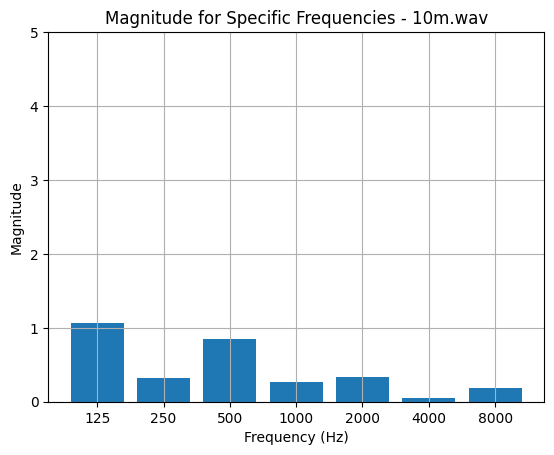

 17%|█▋        | 1/6 [00:00<00:04,  1.01it/s]

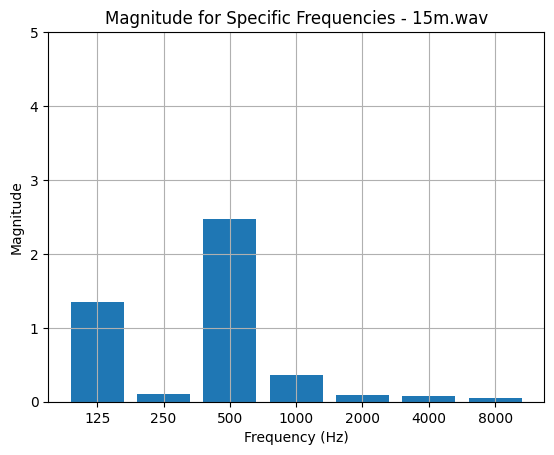

 33%|███▎      | 2/6 [00:01<00:02,  1.34it/s]

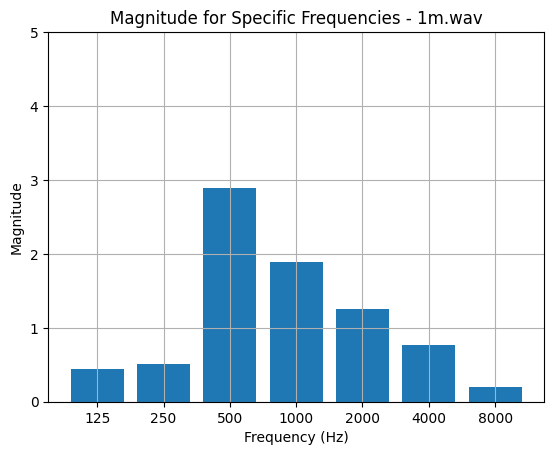

 50%|█████     | 3/6 [00:02<00:02,  1.48it/s]

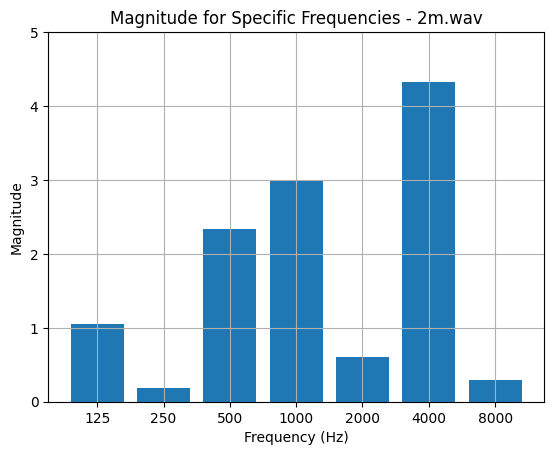

 67%|██████▋   | 4/6 [00:02<00:01,  1.50it/s]

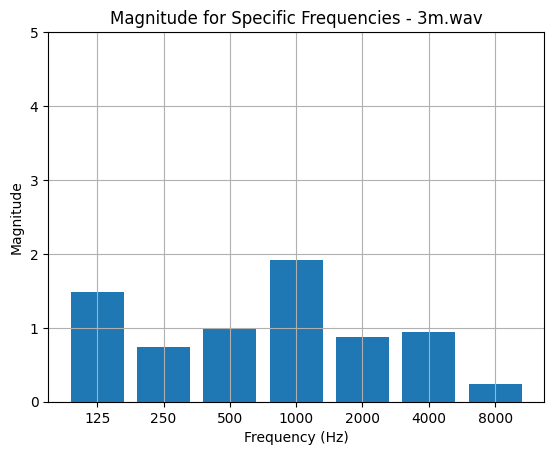

 83%|████████▎ | 5/6 [00:03<00:00,  1.47it/s]

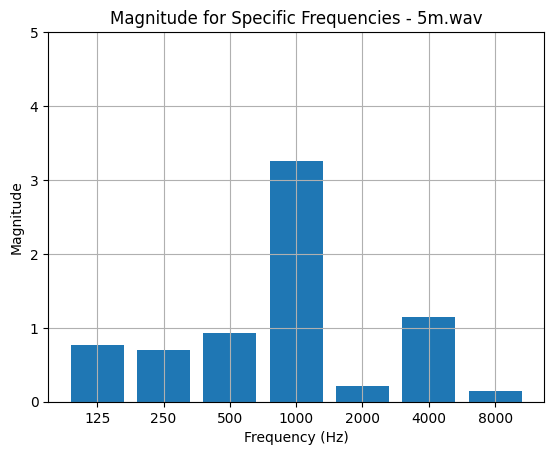

100%|██████████| 6/6 [00:04<00:00,  1.47it/s]


In [6]:
import librosa
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

wav_folder = Path().cwd().joinpath("Field Rec")

# Loop through each wav file in the folder
for wav in (pbar := tqdm(list(wav_folder.glob("*.wav")))):
# Load the .wav file
#audio_path = 'C:/Users/fspintern1/Desktop/Internship - Hussam/Intern/Collected Data/Field Rec/5m.wav'

    sound_data, sampling_rate = librosa.load(wav, sr=None)
    # Calculate the FFT magnitude
    fft_magnitude = np.abs(np.fft.fft(sound_data))

    # Frequencies of interest
    frequencies = [125, 250, 500, 1000, 2000, 4000, 8000]

    # Find the indices corresponding to the frequencies of interest
    indices = []
    for freq in frequencies:
        index = int(freq * len(fft_magnitude) / sampling_rate)
        indices.append(index)

    # Extract the magnitudes for the frequencies of interest
    magnitudes = fft_magnitude[indices]

    # Plot a bar chart of the magnitudes
    plt.bar(np.arange(len(frequencies)), magnitudes)
    plt.xticks(np.arange(len(frequencies)), frequencies)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude for Specific Frequencies - ' + wav.name)
    plt.ylim(0, 5)
    plt.grid(True)
    plt.show()
